# Big Mart Sales Prediction Project
This notebook loads the dummy dataset, preprocesses it, trains a Gradient Boosting Regressor, and evaluates performance.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('bigmart_dummy.csv')
df.head()

,Item_Weight,Item_MRP,Item_Visibility,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,13.99,192.49,0.068630,Health & Hygiene,Large,Tier 2,Supermarket Type1,807.05
1,11.45,73.10,0.162011,Health & Hygiene,Small,Tier 3,Supermarket Type1,100.00
2,14.59,172.09,0.015152,Health & Hygiene,Medium,Tier 1,Grocery Store,261.78
3,18.09,88.85,0.057738,Health & Hygiene,Medium,Tier 1,Grocery Store,344.15
4,11.06,332.88,0.114412,Household,Small,Tier 2,Supermarket Type1,218.49


In [6]:
# Split features and target
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

# Define numerical and categorical features
num_features = ['Item_Weight','Item_Visibility','Item_MRP']
cat_features = [c for c in X.columns if c not in num_features]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Full model pipeline
model = Pipeline([
    ('prep', preprocessor),
    ('gb', GradientBoostingRegressor())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


MAE: 155.41150276157867
RMSE: 189.78674636648876
R2: 0.6154357177172883


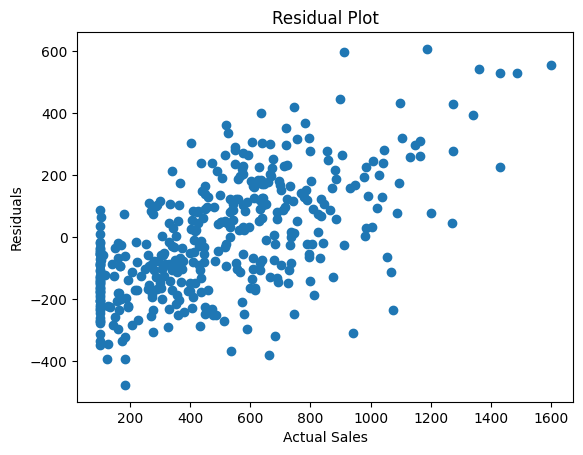

In [7]:
# Plot residuals
plt.scatter(y_test, y_test - y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()